In [ ]:
# Import library yang diperlukan

# 1. Pandas untuk manipulasi dan analisis data, terutama dengan struktur DataFrame.
import pandas as pd

# 2. NumPy untuk operasi matematis dan komputasi array n-dimensi.
import numpy as np

# 3. LabelBinarizer dari sklearn.preprocessing untuk mengonversi label kategori
#    menjadi format biner (one-hot encoding).
from sklearn.preprocessing import LabelBinarizer

# 4. KNeighborsClassifier dari sklearn.neighbors adalah algoritma K-Nearest Neighbors (KNN)
#    untuk klasifikasi berbasis jarak.
from sklearn.neighbors import KNeighborsClassifier


# 5. Fungsi-fungsi evaluasi dari sklearn.metrics:
#    - accuracy_score: untuk menghitung akurasi prediksi.
#    - precision_score: untuk menghitung presisi model.
#    - recall_score: untuk menghitung sensitivitas (recall).
#    - f1_score: untuk menghitung rata-rata harmonik antara presisi dan recall.
#    - classification_report: untuk menampilkan ringkasan metrik evaluasi.
#    - matthews_corrcoef: untuk menghitung koefisien korelasi Matthews.
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, matthews_corrcoef
)

# 6. Fungsi `euclidean` dari scipy.spatial.distance untuk menghitung jarak Euclidean
#    antara dua titik dalam ruang n-dimensi.
from scipy.spatial.distance import euclidean

# 7. Matplotlib untuk membuat visualisasi data (plotting).
import matplotlib.pyplot as plt

# 8. Seaborn untuk membuat visualisasi data statistik yang lebih menarik.
import seaborn as sns

In [ ]:
# Import google drive ke google colab

from google.colab import drive

In [ ]:
# connect google drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/MP 1/car_data.csv'

In [ ]:
# Membaca dataset

df = pd.read_csv(path)

In [ ]:
# Tampilkan beberapa baris pertama dataset untuk melihan struktur data
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
# Memeriksa data yang hilang

print(df.isnull().sum())

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


In [ ]:
# Melihat informasi umum tentang dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None


In [ ]:
# Melihat statistik deskriptif untuk kolom numerik

print(df.describe())

           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000


In [ ]:
# Mengganti nilai kolom 'Purchased' dari (1, 0) menjadi (Yes, No)

df['User ID'] = df['User ID'].replace({1: 'Yes', 0: 'No'})

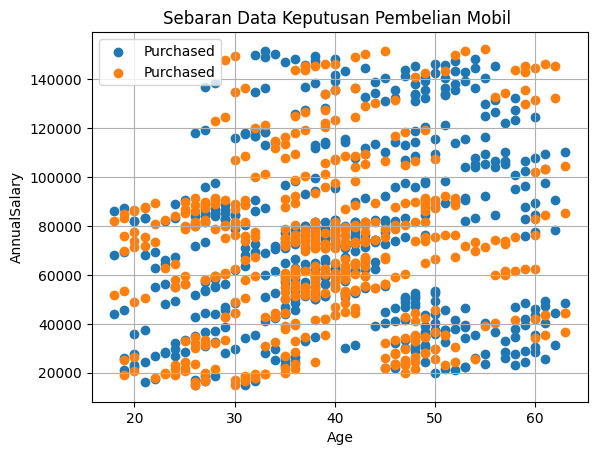

In [ ]:
# Visualisasi Data

# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'Gender'
for Height, d in df.groupby('Gender'):
    # Membuat scatter plot untuk setiap grup
    # x = data 'Age' (umur), y = data 'Weight' ()
    # 'label=Age' memberikan label untuk setiap grup (diambil dari nilai kolom 'Gender')
    ax.scatter(d['Age'], d['AnnualSalary'], label= 'Purchased')

# Menambahkan legenda untuk membedakan grup berdasarkan 'Gender'
plt.legend(loc='upper left')

# Menambahkan judul pada plot
plt.title('Sebaran Data Keputusan Pembelian Mobil ')

# Menambahkan label pada sumbu x (Umur)
plt.xlabel('Age')

# Menambahkan label pada sumbu y
plt.ylabel('AnnualSalary')

# Menambahkan grid untuk mempermudah pembacaan plot
plt.grid(True)

# Menampilkan plot ke layar
plt.show()

In [ ]:
# Mengonversi kolom 'Age' dan 'Glucose' dari DataFrame df menjadi array NumPy 2D
# Data ini digunakan sebagai fitur (input) untuk model machine learning
x_train = np.array(df[['Age', 'AnnualSalary']])

# Mengonversi kolom 'hasil_tes_laboratorium' dari DataFrame df menjadi array NumPy 1D
# Data ini digunakan sebagai label (output) untuk model machine learning
y_train = np.array(df['Purchased'])

# Mencetak isi x_train (fitur/input) dengan format array NumPy
print(f'x_train:\n{x_train}\n')

# Mencetak isi y_train (label/output) dengan format array NumPy
print(f'y_train: {y_train}')

x_train:
[[    35  20000]
 [    40  43500]
 [    49  74000]
 ...
 [    28 138500]
 [    48 134000]
 [    44  73500]]

y_train: [0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0

In [ ]:
# Membuat objek LabelBinarizer, yang digunakan untuk mengonversi label kategori menjadi format biner
lb = LabelBinarizer()

# Menggunakan LabelBinarizer untuk mengonversi y_train (label asli) menjadi format biner
# fit_transform() secara otomatis melakukan dua hal:
# 1. Menyesuaikan LabelBinarizer dengan data (fit)
# 2. Mengonversi data sesuai dengan skema biner (transform)
y_train = lb.fit_transform(y_train)

# Mencetak hasil y_train setelah dikonversi ke format biner
print(f'y_train: {y_train}')

y_train: [[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

In [ ]:
# Mengubah array 2D y_train menjadi array 1D menggunakan fungsi flatten()
# Setelah LabelBinarizer, y_train berbentuk array 2D dengan setiap label dalam format biner,
# seperti [[0], [1], [1], ...]. flatten() mengubahnya menjadi [0, 1, 1, ...].
y_train = y_train.flatten()

# Mencetak hasil y_train setelah diubah menjadi array 1D
print(f'y_train: {y_train}')

y_train: [0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 1 1

In [ ]:
# Menentukan jumlah nearest neighbors/tetangga terdekat (K) yang digunakan dalam algoritma K-Nearest Neighbors (KNN)
K = 10

# Membuat objek model KNeighborsClassifier dengan parameter n_neighbors=K
# n_neighbors menentukan jumlah tetangga yang akan dipertimbangkan dalam proses klasifikasi
model = KNeighborsClassifier(n_neighbors=K)

# Melatih model KNN menggunakan data latih (x_train) dan label latih (y_train)
# model.fit() akan menemukan pola dalam data latih untuk kemudian digunakan dalam prediksi
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Prediksi Resiko

# Menetapkan nilai umur (A_Age) dan kadar glukosa (A_AnnualSalary) untuk data baru
A_Age = 50
A_AnnualSalary = 100

# Membuat array NumPy dengan data baru [A_Age, A_AnnualSalary] dan mengubahnya menjadi array 2D dengan reshape
# reshape(1, -1) mengubah array 1D menjadi array 2D dengan 1 baris dan sejumlah kolom sesuai panjang array
x_new = np.array([A_Age, A_AnnualSalary]).reshape(1, -1)

# Menampilkan x_new untuk memverifikasi format data baru (array 2D dengan 1 baris)
x_new

array([[ 50, 100]])

In [ ]:
# Menggunakan model yang telah dilatih (model) untuk memprediksi label dari data baru (x_new)
# model.predict(x_new) akan mengembalikan hasil prediksi berdasarkan input data baru
y_new = model.predict(x_new)

# Menampilkan hasil prediksi y_new yang berisi label  untuk data baru
y_new

array([0])

In [ ]:
# Menggunakan inverse_transform() dari LabelBinarizer untuk mengonversi hasil prediksi (y_new)
# dari format biner kembali ke label asli.
# Ini diperlukan karena LabelBinarizer mengubah label menjadi format biner selama pelatihan,
# dan kita ingin mengembalikannya ke format aslinya (misalnya, yes atau no).
lb.inverse_transform(y_new)

array([0])

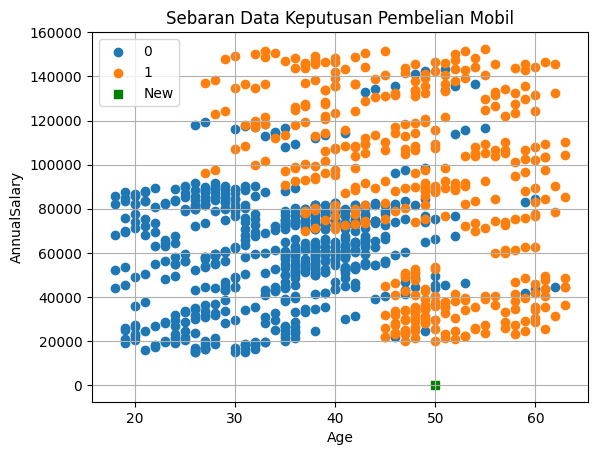

In [ ]:
# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'Purchased'
for Age, d in df.groupby('Purchased'):
    # Membuat scatter plot untuk setiap grup
    # x = data 'Age' (umur), y = data 'Glucose'
    # 'label=Age' memberikan label untuk setiap grup (diambil dari nilai kolom 'Purchased')
    ax.scatter(d['Age'], d['AnnualSalary'], label=Age)

# Menambahkan titik data baru (A_Age, A_AnnualSalary) dengan gaya khusus
# Titik ini digambarkan dengan bentuk persegi ('marker='s'') dan warna hijau
# Label 'Misterius' akan muncul di legenda untuk titik ini
plt.scatter(A_Age,
            A_AnnualSalary,
            marker='s',  # Menandakan titik data baru menggunakan bentuk persegi
            color='green',  # Menentukan warna titik data baru menjadi hijau
            label='New')  # Label untuk titik data baru

# Menambahkan legenda untuk membedakan grup berdasarkan 'Outcome' dan data baru 'Misterius'
plt.legend(loc='upper left')

# Menambahkan judul pada plot
plt.title('Sebaran Data Keputusan Pembelian Mobil')

# Menambahkan label pada sumbu x (Umur)
plt.xlabel('Age')

# Menambahkan label pada sumbu y
plt.ylabel('AnnualSalary')

# Menambahkan grid ke plot untuk mempermudah pembacaan visual
plt.grid(True)

# Menampilkan plot ke layar
plt.show()


In [ ]:
# Membuat array NumPy baru dengan data umur (A_Age) dan kadar glukosa (A_Glucose)
# Data ini disimpan dalam array 1D yang berisi dua nilai: umur dan kadar glukosa
New = np.array([A_Age, A_AnnualSalary])

# Menampilkan array 'New' yang berisi nilai umur dan kadar glukosa
New

array([ 50, 100])

In [ ]:
# 'x_train' adalah array atau DataFrame yang berisi data latih (fitur) yang digunakan untuk melatih model
# Dalam konteks ini, 'x_train' berisi dua kolom fitur: 'Age' (Umur) dan 'AnnualSalary',
x_train

array([[    35,  20000],
       [    40,  43500],
       [    49,  74000],
       ...,
       [    28, 138500],
       [    48, 134000],
       [    44,  73500]])

In [ ]:
# Menghitung jarak Euclidean antara data baru (New) dan setiap data dalam x_train
# Jarak Euclidean dihitung untuk setiap elemen (d) dalam x_train menggunakan list comprehension
data_jarak = [euclidean(New, d) for d in x_train]

# Menampilkan list 'data_jarak' yang berisi jarak Euclidean antara data baru (New) dan setiap data latih
data_jarak

[19900.00565326553,
 43400.00115207372,
 73900.0000067659,
 107400.00046554935,
 78900.00396070966,
 33400.00013473054,
 132400.00006042296,
 63900.00050078247,
 84400.00236966822,
 51900.00078034682,
 79900.00040050062,
 22900.00019650655,
 72400.00223756903,
 56900.004648505965,
 107900.0002965709,
 148900.00097044997,
 74900.00150200266,
 52900.00212665402,
 78900.00010139417,
 133900.00045182972,
 51400.00117704279,
 38900.000012853474,
 25400.000314960627,
 61400.00065960912,
 117400.00153747869,
 57900.00583765083,
 106900.00046772684,
 97400.00051334703,
 28900.00006920415,
 147400.00048846676,
 25900.000482625477,
 67400.0024035608,
 61900.001365104996,
 79400.00051007557,
 113400.00015873015,
 41400.000108695654,
 54900.0013114754,
 114400.00052884615,
 72900.00043895748,
 14900.019328846523,
 37400.01124331382,
 39400.00102791877,
 66400.00091114457,
 80400.00030472637,
 85900.00000582072,
 74900.00112817089,
 76400.0000065445,
 122900.00196908053,
 48400.00083677685,
 60400.

In [ ]:
# Menambahkan kolom baru ke DataFrame 'df' dengan nama 'jarak' yang berisi data jarak Euclidean
# 'data_jarak' adalah list yang berisi jarak Euclidean antara data baru (New) dan setiap data dalam x_train.
df['jarak'] = data_jarak

# Mengurutkan DataFrame 'df' berdasarkan kolom 'jarak' secara ascending (default)
# Ini akan mengurutkan data berdasarkan jarak terdekat ke data baru (New).
df.sort_values(['jarak'])

,User ID,Gender,Age,AnnualSalary,Purchased,jarak
977,794,Female,31,15000,0,14900.012114
819,400,Male,30,15000,0,14900.013423
352,396,Female,26,15000,0,14900.019329
39,489,Male,26,15000,0,14900.019329
104,225,Male,26,16000,0,15900.018113
...,...,...,...,...,...,...
272,941,Female,34,150500,1,150400.000851
81,277,Male,53,151500,1,151400.000030
399,838,Male,45,151500,1,151400.000083
95,485,Female,33,151500,1,151400.000954


In [ ]:
#Testing Set

# Membuat array NumPy untuk data uji (x_test), yang berisi fitur yang akan diuji oleh model
# Setiap baris dalam 'x_test' berisi dua nilai: umur dan kadar glukosa untuk masing-masing data uji
x_test = np.array([[20, 30], [40, 200], [35, 100], [55, 45]])

# Membuat array NumPy untuk label target uji (y_test), yang berisi hasil untuk masing-masing data uji
# Label target adalah 'Yes' atau 'No', yang diubah menjadi format biner menggunakan LabelBinarizer
# Fungsi 'transform()' mengonversi label asli ('Yes' dan 'No') menjadi angka biner (1 untuk 'Yes', 0 untuk 'No')
y_test = lb.transform(np.array(['No', 'Yes', 'No', 'Yes'])).flatten()

# Menampilkan nilai 'x_test' yang berisi fitur dari data uji (umur dan glukosa)
print(f'x_test:\n{x_test}\n')

# Menampilkan nilai 'y_test' yang berisi label target dalam format biner (0 atau 1)
print(f'y_test: {y_test}')

x_test:
[[ 20  30]
 [ 40 200]
 [ 35 100]
 [ 55  45]]

y_test: [0 0 0 0]


In [ ]:
# Prediksi terhadap testing set

# Menggunakan model yang telah dilatih untuk membuat prediksi berdasarkan data uji (x_test)
# 'model.predict()' akan memprediksi label target (misalnya, 'Yes' atau 'No') untuk setiap data di 'x_test'
y_pred = model.predict(x_test)

# Menampilkan hasil prediksi yang disimpan dalam variabel 'y_pred'
# 'y_pred' berisi array dengan prediksi model untuk setiap data uji dalam 'x_test'
y_pred

array([0, 0, 0, 0])

In [ ]:
# Menghitung akurasi model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'accuracy_score()' dari sklearn.metrics akan menghitung persentase prediksi yang benar dari total prediksi
acc = accuracy_score(y_test, y_pred)

# Menampilkan nilai akurasi yang dihitung
# 'acc' berisi nilai akurasi yang menunjukkan seberapa tepat model dalam memprediksi label yang benar
print(f'Accuracy: {acc}')

Accuracy: 1.0


In [ ]:
# Menghitung presisi model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'precision_score()' dari sklearn.metrics digunakan untuk menghitung presisi
# Presisi adalah rasio antara prediksi positif yang benar (True Positives) dengan seluruh prediksi positif (True Positives + False Positives)
prec = precision_score(y_test, y_pred)

# Menampilkan nilai presisi yang dihitung
# 'prec' berisi nilai presisi yang menunjukkan seberapa akurat model dalam mengklasifikasikan kelas positif (misalnya 'Yes')
print(f'Precision: {prec}')

Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Menghitung recall (sensitivitas) model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'recall_score()' dari sklearn.metrics digunakan untuk menghitung recall
# Recall adalah rasio antara prediksi positif yang benar (True Positives) dengan seluruh data yang sebenarnya positif (True Positives + False Negatives)
rec = recall_score(y_test, y_pred)

# Menampilkan nilai recall yang dihitung
# 'rec' berisi nilai recall yang menunjukkan seberapa baik model dalam mendeteksi semua kasus positif
print(f'Recall: {rec}')

Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Menghitung F1 score model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'f1_score()' dari sklearn.metrics digunakan untuk menghitung F1 score
# F1 score adalah rata-rata harmonis antara presisi dan recall, yang memberikan keseimbangan antara keduanya
# Formula F1 score adalah: F1 = 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_pred)

# Menampilkan nilai F1 score yang dihitung
# 'f1' berisi nilai F1 score yang menunjukkan keseimbangan antara presisi dan recall untuk model
print(f'F1 Score: {f1}')

F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Menghitung laporan klasifikasi untuk menilai kinerja model dalam hal presisi, recall, f1 score, dan akurasi
# Fungsi 'classification_report()' dari sklearn.metrics menghasilkan laporan evaluasi yang lebih lengkap
# Laporan ini mencakup metrik-metrik seperti presisi, recall, F1 score, dan support untuk setiap kelas (misalnya, 'Yes' dan 'No')
cls_report = classification_report(y_test, y_pred)

# Menampilkan laporan klasifikasi yang dihitung
# 'cls_report' berisi ringkasan metrik evaluasi model yang memberikan informasi detail tentang kinerja model per kelas
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

